# Genetic Engineering Attribution

## Introduction

Your goal is to create an algorithm that identifies the most likely lab-of-origin for genetically engineered DNA.

Applications for genetic engineering are rapidly diversifying. Researchers across the world are using powerful new techniques in synthetic biology to solve some of the world’s most pressing challenges in medicine, agriculture, manufacturing and more. At the same time, increasingly powerful genetically engineered systems could yield unintended consequences for people, food crops, livestock, and industry. These incredible advances in capability demand tools that support accountable innovation.

Genetic engineering attribution is the process of identifying the source of a genetically engineered piece of DNA. This ability ensures that scientists who have spent countless hours developing breakthrough technology get their due credit, intellectual property is protected, and responsible innovation is promoted. By connecting a genetically engineered system with its designers, society can examine the policies, processes, and decisions that led to its creation. As has been observed in other disciplines, reducing anonymity encourages more prudent behavior within scientific and entrepreneurial communities—without stifling innovation.

Development of attribution capabilities is critical for the maturation of genetic engineering as a field, protecting the significant benefits it promises society while promoting accountability, responsibility, and dialog. In this competition, we challenge you to advance the state-of-the-art in this exciting new domain!

In [1]:
#Step:1 - Load Dataset
import nbconvert
import pandas as pd
train_df = pd.read_csv("G:/DataScienceProject/Drivendata-Genetic-Engineering-Attribution/train_values.csv")
train_label_df = pd.read_csv("G:/DataScienceProject/Drivendata-Genetic-Engineering-Attribution/train_labels.csv")
train_df.head()

,sequence_id,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
0,9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
train_label_df.head()

,sequence_id,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
0,9ZIMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5SAQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E7QRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CT5FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7PTD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Step2 - Check for reduce unuseful columns
a = list(train_df)
for i, value in enumerate(a):
    if len(train_df[value].unique()) < 2:
        print(value)

a = list(train_label_df)
for i, value in enumerate(a):
    if len(train_label_df[value].unique()) < 2:
        print(value)

At this part, we runs 2 type of classifications:
- Use the train_df without 'sequence' column to classify our labels
- Use only 'sequence' as text sequense to classify our labels

In [5]:
#Step3 - Build new dataframe for classifiy sequence to labels
df3 = train_label_df
df3 = df3.drop(['sequence_id'], axis=1)
df3['sequence'] = train_df['sequence']
df3.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO,sequence
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...


In [6]:
#Step4 - Fastai
from fastai.text import *

In [7]:
data = (TextList.from_df(df3, cols='sequence')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,c xxup atcggcgacgg xxrep 4 c xxup gtgctgctgcccgacaaccactacctgagcacccagtccgccctgagcaaaga xxrep 4 c xxup xxunk xxrep 4 c xxup gtggatgaagacggattgccctcatttgatgcactgacagatggagccgtgaccactgacaacgaggccagtccttcctccatgcctgacggca xxrep 4 c t xxrep 5 c xxup tcaggaggcagaagagccgtctctacttaagaagctcttactggcaccagccaacactcagctcagctacaatgaatgcagcggtcttagcactcagaaccatgcagcaaaccacacccacaggatcagaacaaaccctgccattgttaagaccgagaattcatggagcaataaagcgaagagcatttgtcaacagc xxrep 4 a xxup gccacaaagacgtccctgctcagagcttctcaagtatctgaccacaaacgatgaccctcctcacaccaaacccacag xxrep 4 a xxup caggaacagcagcagagacaaatgtgcttcc xxrep 5 a xxup gaagtcccatacacaaccgcagtcgcaacatgctcaagccaaaccaacaactttatctcttcctctga xxrep 4 c xxup agagtcaccaaatga xxrep 4 c xxup aagggtt xxrep 4 c xxup atttgagaacaagactattgagcgaaccttaagtgtggaactctctggaactgcaggcctaactcctcccacaactcctcctcataaagccaaccaagataaccctttcaaggcttcgccaaagctgaagccctcttgcaagaccgtggtgccaccgccaaccaagagggcccggtacagtgagtgttctggtacccaaggcagccactccaccaagaaagggcccgagcaatctgagttgtacgcacaactcagcaagtcctcagggctcagccgaggacacgaggaaaggaagactaaacggcccagtctccggctgtttggtgaccatgactactgtcagtcactcaattcc xxrep 4 a xxup cggatatactcattaacatatcacaggagctccaagactctagacaactagacttcaaagatgcctcctgtgactggca xxrep 4 g xxup cacatctgttcttccacagattcaggccagtgctacctgagagagactttggaggccagcaagcaggtctctccttgcagcaccag xxrep 4 a
1,xxunk xxrep 5 t xxup xxunk xxrep 4 t xxup xxunk xxrep 5 t xxup xxunk xxrep 5 t xxup xxunk xxrep 5 a xxup xxunk xxrep 5 a xxup xxunk xxrep 8 t xxup xxunk xxrep 4 a xxup xxunk xxrep 4 t xxup xxunk xxrep 5 t xxup xxunk xxrep 7 a xxup tgctttatttgtgaaatttgtgatgctattgctttatttgtaaccattataagctgcaataaacaagttaacaacaacaattgcattca xxrep 4 t xxup atgtttcaggttca xxrep 5 g xxup aggtgtgggagg xxrep 6 t xxup
2,4 c xxup tccgacgg xxrep 4 c xxup gtaatgcagaagaagactatgggctgggagccctccaccgagcgcctgta xxrep 5 c xxup xxunk xxrep 4 a xxup cgaaaggctcagtcgaaagactgggcctttcg xxrep 4 t xxup atctgttgtttgtcggtgaacgctctcctgagtaggacaaatccgccgggagcggatttgaacgttgcgaagcaacggcccggagggtggcgggcaggacgcccgccataaactgccagggaattccaactgagcgccggtcgctaccattaccaacttgtctggtgtc xxrep 5 a xxup taatagga xxrep 4 t xxup gtt xxrep 4 a xxup ttcgcgttaaa xxrep 5 t xxup gttaaatcagctca xxrep 6 t xxup aaccaataggccgactgcgatgagtggcagggc xxrep 4 g xxup cgtaa xxrep 7 t xxup aaggcagttattggtgcccttaaacgcctggtgctacgcctgaataagtgataataagcggatgaatggcagaaattcgaaagcaaattcgacccggtcgtcggttcagggcagggtcgttaaatagccgcttatgtctattgctggtttaccggtttattgactaccggaagcagtgtgaccgtgtgcttctcaaatgcctgaggccagtttgctcaggctct xxrep 4 c xxup gtggaggtaataattgacgatatgatcatttattctgcctcccagagcctgat xxrep 5 a xxup cggtgaatccgttagcgaggtgccgccggcttccattcaggtcgaggtggcccggctccatgcaccgcgacgcaacgc xxrep
3,xxrep 4 c xxup aaggacctgaaatgaccctgtgccttatttgaactaaccaatcagttcgcttctcgcttctgttcgcgcgcttctgct xxrep 4 c xxup gagctcaat xxrep 4 a xxup gagcccacaa xxrep 4 c xxup tcactc xxrep 4 g xxup cgccagtcctccgattgactgagtcgcccgggtacccgtgtatccaataaaccctcttgcagttgcatccgacttgtggtctcgctgttccttgggagggtctcctctgagtgattgactacccgtcagc xxrep 5 g xxup tctttcatttccgacttgtggtctcgctgccttgggagggtctcctctgagtgattgactacccgtcagc xxrep 5 g xxup tcttcacatgcagcatgtatc xxrep 4 a xxup ttaatttgg xxrep 8 t xxup cttaagtatttacattaaatggccatagttgcattaatgaatcggccaacgcgc xxrep 4 g xxup agaggcggtttgcgtattggcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatca xxrep 4 g xxup ataacgcaggaaagaacatgtgagc xxrep 4 a xxup ggccagc xxrep 4 a xxup ggccaggaaccgt xxrep 5 a xxup ggccgcgttgctggcg
4,xxup ggatctaggtgaagatcc xxrep 5 t xxup gataatctcatgacc xxrep 4 a xxup tcccttaacgtgag xxrep 4 t xxup cgttccactgagcgtcaga xxrep 4 c xxup gtag xxrep 4 a xxup gatcaaaggatcttcttgagatcc xxrep 7 t xxup ctgcgcgtaatctgctgcttgcaaac xxrep 7 a xxup ccaccgctaccagcggtggtttgtttgccggatcaagagctaccaactc xxrep 5 t xxup ccgaaggtaactggcttcagcagagcgcagataccaaatactgtccttctagtgtagccgtagttaggccaccacttcaagaactctgtagcaccgcctacatacctcgctctgctaatcctgttaccagtggctgctgccagtggcgataagtcgtgtcttaccgggttggactcaagacgatagttaccggataaggcgcagcggtcgggctgaac xxrep 6 g xxup ttcgtgcacacagcccagcttggagcgaacgacctac

In [8]:
learn = language_model_learner(data,AWD_LSTM, drop_mult=0.3)

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


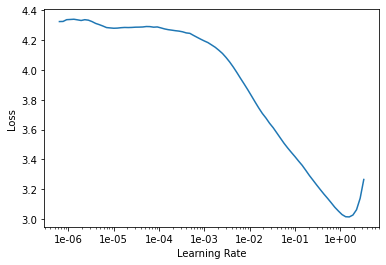

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.330817,0.262013,0.947483,31:19


In [12]:
learn.save_encoder('fine_tuned_enc')

In [13]:
label_cols = list(df3)[:-1]
label_cols

['00Q4V31T',
 '012VT4JK',
 '028IO5W2',
 '03GRNN7N',
 '03Y3W51H',
 '09MQV1TY',
 '0A4AHRCT',
 '0A9M05NC',
 '0B9GCUVV',
 '0CL7QVG8',
 '0CML4B5I',
 '0DTHTJLJ',
 '0FFBBVE1',
 '0HWCWFNU',
 '0L3Y6ZB2',
 '0M44GDO8',
 '0MDYJM3H',
 '0N3V9P9M',
 '0NP55E93',
 '0PJ91ZT6',
 '0R296F9R',
 '0T2AZBD6',
 '0URA80CN',
 '0VRP2DI6',
 '0W6O08VX',
 '0WHP4PPK',
 '0XPTGGLP',
 '0XS4FHP3',
 '0Y24J5G2',
 '10TEBWK2',
 '11TTDKTM',
 '131RRHBV',
 '13LZE1F7',
 '14PBN8C2',
 '15D0Z97U',
 '15S88O4Q',
 '18C9J8EH',
 '19CAUKJB',
 '1AP294AT',
 '1B9BJ2IP',
 '1BE35FI1',
 '1CIHYCE4',
 '1DJ9L58E',
 '1DTDCRUO',
 '1EDZ6CA7',
 '1HCQTAYT',
 '1HK4VXP8',
 '1IXFZ3HO',
 '1K11RCST',
 '1KC6XYO6',
 '1KNFJ6KQ',
 '1KZHNVYR',
 '1LBGAU5Z',
 '1NXRMDN6',
 '1OQJ21E9',
 '1OWZDF82',
 '1PA232PA',
 '1PIGWQFY',
 '1Q1IUY3G',
 '1S515B69',
 '1TC200QC',
 '1TI4HS4X',
 '1UOA7CA1',
 '1UREJUSJ',
 '1UU0CHTK',
 '1VPOX8VI',
 '1VQS4WNS',
 '1X0VC0O1',
 '1XU60MET',
 '1ZC8RPN1',
 '20ABQYHS',
 '20CEB9KE',
 '216DWMG6',
 '21ZFBX5E',
 '24SL2992',
 '25UVYUID',
 '26KK8UM5',

In [14]:
learn.export('G:/DataScienceProject/Drivendata-Genetic-Engineering-Attribution/fastai.pkl')

In [15]:
test_df = pd.read_csv("G:/DataScienceProject/Drivendata-Genetic-Engineering-Attribution/test_values.csv")

In [18]:
test_datalist = TextList.from_df(test_df, cols='sequence', vocab=data.vocab)

data_clas = (TextList.from_df(df3, cols='sequence', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= label_cols , classes=label_cols)
             .add_test(test_datalist)
             .databunch(bs=32))

data_clas.show_batch()

text,target
xxbos xxup aaattgtaaacgttaata xxrep 4 t xxup gtt xxrep 4 a xxup ttcgcgttaaa xxrep 5 t xxup gttaaatcagctca xxrep 6 t xxup aaccaataggccgaaatcggc xxrep 4 a xxup tcccttataaatc xxrep 4 a xxup gaatagaccgagatagggttgagtgttgttccagtttggaacaagagtccactattaaagaacgtggactccaacgtcaaagggcg xxrep 5 a xxup ccgtctatcagggcgatggcccactacgtgaaccatcaccctaatcaag xxrep 6 t xxrep 4 g xxup tcgaggtgccgtaaagcactaaatcggaaccctaaagggag xxrep 5 c xxup gatttagagcttgac xxrep 4 g xxup aaagccggcgaacgtggcgagaaaggaagggaagaaagcgaaaggagcgggcgctagggcgctggcaagtgtagcggtcacgctgcgcgtaaccaccacacccgccgcgcttaatgcgccgctacagggcgcgtcccattcgccattcaggctgcgcaactgttgggaagggcgatcggtgcgggcctcttcgctattacgccagctggcgaaa xxrep 5 g xxup atgtgctgcaaggcgattaagttgggtaacgccaggg xxrep 4 t xxup cccagtcacgacgttgt xxrep 4 a xxup,BLFM4YKK
xxbos xxup xxunk xxrep 4 t xxup xxunk xxrep 4 t xxup xxunk xxrep 4 a xxup xxunk xxrep 5 t xxup xxunk xxrep 5 a xxup xxunk xxrep 4 a xxup xxunk xxrep 4 t xxup xxunk xxrep 4 c xxup xxunk xxrep 4 t xxup xxunk xxrep 5 a xxup tta xxrep 4 t xxup xxunk xxrep 4 t xxup xxunk xxrep 4 t a xxrep 4 c,HVAG84XI
xxbos xxup cggccgcacgtctaagaaaccattattatcatgacattaacctat xxrep 5 a xxup xxunk xxrep 4 c xxup at xxrep 4 c xxup xxunk xxrep 4 g xxup xxunk xxrep 4 a g xxrep 4 t xxup cttt xxrep 4 c xxup xxunk xxrep 4 a xxup xxunk xxrep 4 g xxup xxunk xxrep 4 g xxup xxunk xxrep 4 a xxup xxunk xxrep 5 g xxup xxunk xxrep 4 c xxup xxunk xxrep 4 c,QVAZPYQ8
xxbos xxup xxunk xxrep 4 c xxup gagaagtt xxrep 6 g a xxrep 4 g xxup tcggcaattgaaccggtgcctagagaaggtggcgc xxrep 4 g xxup taaactgggaaagtgatgtcgtgtactggctccgcc xxrep 5 t xxup cccgagggt xxrep 5 g xxup agaaccgtatataagtgcagtagtcgccgtgaacgttc xxrep 5 t xxup cgcaacgggtttgccgccagaacacaggtaagtgccgtgtgtggttcccgcgggcctggcctctttacgggttatggcccttgcgtgccttgaattacttccacctggctccagtacgtgattcttgatcccgagctggagcca xxrep 4 g xxup cgggccttgcgctttaggag xxrep 4 c xxup ttcgcctcgtgcttgagttgaggcctggcctgggcgct xxrep 4 g xxup ccgccgcgtgcgaatctggtggcaccttcgcgcctgtctcgctgctttcgataagtctctagccattt xxrep 4 a xxrep 5 t xxup gatgacctgctgcgacgc xxrep 7 t xxup ctggcaagatagtcttgtaaatgcgggccaggatctgcacactggtatttcgg xxrep 5 t xxup gggcccgcggccggcgac,5PR9OSRS
xxbos xxup cggccgcacgtctaagaaaccattattatcatgacattaacctat xxrep 5 a xxup xxunk xxrep 5 a c xxrep 5 a xxup xxunk xxrep 5 c xxup xxunk xxrep 4 g xxup xxunk xxrep 4 c xxup xxunk xxrep 4 g xxup xxunk xxrep 5 c xxup xxunk xxrep 6 g xxup xxunk xxrep 4 g xxup xxunk xxrep 4 a xxup xxunk xxrep 4 a xxup xxunk xxrep 5 c xxup xxunk xxrep 4 g,QVAZPYQ8


In [19]:
learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn_classifier.load_encoder('fine_tuned_enc')
learn_classifier.freeze()

In [20]:
learn_classifier.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


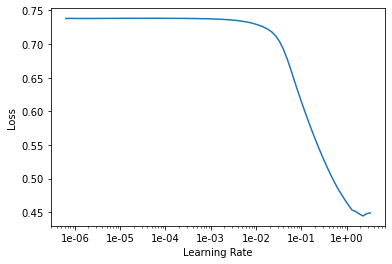

In [21]:
learn_classifier.recorder.plot()

In [22]:
learn_classifier.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.004540,0.004090,22:14


In [23]:
learn_classifier.freeze_to(-2)
learn_classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.004006,0.004002,22:43


In [24]:
learn_classifier.freeze_to(-3)
learn_classifier.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.003620,0.003387,23:24


In [25]:
learn_classifier.show_results()

text,target,prediction
xxbos xxup xxunk xxrep 4 a xxup ctttgaccttgtgaagtgtcaaccttgactgtcgaaccaccatagtttggcgcgaattgagcgtcataattgtttactctcagtgcagtcaacatgtcgagtttcgtgccgaataaagagcaaacgcggacagtattaa xxrep 4 t xxup ctg xxrep 4 t xxup catttgaag xxrep 4 a xxup xxunk xxrep 4 a xxup gttgaaa xxrep 5 t xxup xxunk xxrep 4 t xxup xxunk xxrep 4 t xxup gac xxrep 4 a xxup xxunk xxrep 4 t xxup xxunk xxrep 4 t xxup xxunk xxrep 5 t xxup cgaa xxrep 4 t xxup caataa xxrep 4,FRX9XJYW,
xxbos xxup catcatcaataatatacctta xxrep 4 t xxup ggattgaagccaatatgataatga xxrep 5 g xxup tggagtttgtgacgtggcgc xxrep 4 g xxup cgtgggaac xxrep 4 g xxup cgggtgacgtagtagtgtggcggaagtgtgatgttgcaagtgtggcggaacacatgtaagcgacggatgtggc xxrep 4 a xxup gtgacg xxrep 5 t xxup ggtgtgcgccggtgtacacaggaagtgacaa xxrep 4 t xxup cgcgcgg xxrep 4 t xxup aggcggatgttgtagtaaatttgggcgtaaccgagtaagatttggcca xxrep 4 t xxup cgcggg xxrep 4 a xxup ctgaataagaggaagtgaaatctgaataa xxrep 4 t xxup gtgttactcatagcgcgtaatatttgtctagggccgc xxrep 4 g xxup actttgaccgtttacgtggagactcgcccaggtg xxrep 5 t xxup ctcaggtg xxrep 4,U8FRHWSV,
xxbos xxup aaattgtaaacgttaata xxrep 4 t xxup gtt xxrep 4 a xxup ttcgcgttaaa xxrep 5 t xxup gttaaatcagctca xxrep 6 t xxup aaccaataggccgaaatcggc xxrep 4 a xxup tcccttataaatc xxrep 4 a xxup gaatagaccgagatagggttgagtgttgttccagtttggaacaagagtccactattaaagaacgtggactccaacgtcaaagggcg xxrep 5 a xxup ccgtctatcagggcgatggcccactacgtgaaccatcaccctaatcaag xxrep 6 t xxrep 4 g xxup tcgaggtgccgtaaagcactaaatcggaaccctaaagggag xxrep 5 c xxup gatttagagcttgac xxrep 4 g xxup aaagccggcgaacgtggcgagaaaggaagggaagaaagcgaaaggagcgggcgctagggcgctggcaagtgtagcggtcacgctgcgcgtaaccaccacacccgccgcgcttaatgcgccgctacagggcgcgtcccattcgccattcaggctgcgcaactgttgggaagggcgatcggtgcgggcctcttcgctattacgccagctggcgaaa xxrep 5 g xxup atgtgctgcaaggcgattaagttgggtaacgccaggg xxrep 4 t xxup cccagtcacgacgttgt xxrep 4 a xxup,VGWO9SBA,
xxbos xxup aaattgtaaacgttaata xxrep 4 t xxup gtt xxrep 4 a xxup ttcgcgttaaa xxrep 5 t xxup gttaaatcagctca xxrep 6 t xxup aaccaataggccgaaatcggc xxrep 4 a xxup tcccttataaatc xxrep 4 a xxup gaatagaccgagatagggttgagtgttgttccagtttggaacaagagtccactattaaagaacgtggactccaacgtcaaagggcg xxrep 5 a xxup ccgtctatcagggcgatggcccactacgtgaaccatcaccctaatcaag xxrep 6 t xxrep 4 g xxup tcgaggtgccgtaaagcactaaatcggaaccctaaagggag xxrep 5 c xxup gatttagagcttgac xxrep 4 g xxup aaagccggcgaacgtggcgagaaaggaagggaagaaagcgaaaggagcgggcgctagggcgctggcaagtgtagcggtcacgctgcgcgtaaccaccacacccgccgcgcttaatgcgccgctacagggcgcgtcccattcgccattcaggctgcgcaactgttgggaagggcgatcggtgcgggcctcttcgctattacgccagctggcgaaa xxrep 5 g xxup atgtgctgcaaggcgattaagttgggtaacgccaggg xxrep 4 t xxup cccagtcacgacgttgt xxrep 4 a xxup,BLFM4YKK,
xxbos xxup gacct xxrep 6 g xxup cacagtgacaatacccgcggccagccttcgagcggcccgcatggccgcccgtcggccggtgcgacgtgcgcggttaagcagggccgccgccgcgcgttgggcggcagtgccgggtcggcggcggtggcgacgtgctacgcgcctccgccgtctcttca xxrep 4 t xxup agcatagcgccgggctccgcgcaccacggtctgaatggccgcgtccactgtggacactggtggcggcgtgggcgtgtagttgcgcgcctcctccaccaccgcgtcgatggcgtcatcgacggtggtgcgcccagtgcggccgcgtttgtgcgcg xxrep 4 c xxup agggcgcgcggtagtgcccgcgcacgcgcactgggtgttggtcggagcgcttcttgg xxrep 4 c xxup gccaaacatcttgcttgggaagcgcagg xxrep 4 c xxup agcctgtgttattgctgggcgatataaggatggacatgcttgctc xxrep 5 a xxup gtgcggctcgataggacgcgcggcgagactatgcccagggccttgtaaacgta xxrep 4 g xxup caggtgcggcgtctggcgtcagtaatggtcactcgctggactcctccgatgctgttgcgcagcggtagcgtcccgtgatctgtgagagcaggaacg xxrep 4 t xxup cactgacggtggtgatggt xxrep 5 g xxup ctggcgggcgcgcc xxrep 4 a xxup tctggttctcgggaaagcgattgaacacgtgggtcagagaggtaaactggcggatgagttgggagtagacggcctggtcgttgtagaagctcttggagtgcacgggcaacagctcggcgcccaccaccggaaagttgctgatctggcgcgtggagcggaaggtcac xxrep 4 g xxup tcttgcatcatgtctggcaacgaccagtagacctgctccgagccgcaggttacgtcaggagtgcaaagcagggtccatgagcggattccggtctgagggtcgccgtagttgtatgcaaggtaccagctgcggtactgggtgaaggtgctgtcattgcttattaggttgtaactgcgtttcttgctgtcctctgtca xxrep 4 g xxup tttgatcaccggtttcttctgaggcttctcgacctcgggttgcgcagc xxrep 5 g xxup cggcagcttcggccgctgcttcggcctcagcgcgcttctcctcagcccgtgtggcaaaggtgtcgccgcgaatggcatgatcgttcatgtcctccaccggctgcattgccgcggctgccgcgttggag

In [26]:
preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
labels = preds.numpy()

In [27]:
labels

array([[3.748678e-06, 3.451483e-06, 6.919496e-06, 1.534465e-07, ..., 3.832419e-07, 1.143104e-06, 2.633506e-07,
        1.066121e-05],
       [2.207659e-06, 6.514254e-08, 7.488711e-07, 5.801184e-07, ..., 1.063493e-05, 3.631477e-07, 1.782875e-06,
        1.178191e-04],
       [2.846830e-05, 2.629395e-05, 4.144958e-06, 2.324558e-06, ..., 3.497438e-06, 3.117921e-03, 2.758713e-05,
        7.757686e-05],
       [3.330139e-04, 1.016890e-03, 4.978001e-05, 1.965206e-05, ..., 5.273554e-05, 1.716481e-04, 2.916880e-04,
        2.784313e-04],
       ...,
       [4.717038e-04, 7.015335e-03, 1.412177e-04, 1.463277e-05, ..., 1.526126e-04, 9.404898e-05, 5.651919e-04,
        2.701334e-05],
       [2.968377e-04, 7.048445e-04, 2.311201e-04, 1.644337e-05, ..., 7.194062e-05, 6.729727e-04, 1.607442e-04,
        4.259677e-06],
       [1.671917e-04, 1.125913e-04, 4.333867e-05, 1.417296e-05, ..., 7.188282e-05, 2.338895e-04, 1.049925e-04,
        1.210500e-04],
       [3.465746e-04, 1.890754e-03, 5.130416e-05, 

In [31]:
submission_part1 = test_df['sequence_id']
submission_part1 = pd.concat([submission_part1, pd.DataFrame(preds.numpy(), columns = label_cols)], axis=1)

submission_part1.to_csv('G:/DataScienceProject/Drivendata-Genetic-Engineering-Attribution/submission_part1.csv', index=False)
submission_part1.head()

,sequence_id,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
0,E0VFT,0.000004,3.451483e-06,6.919496e-06,1.534465e-07,3.622415e-06,5.709481e-07,0.000005,0.000007,0.000113,...,0.000003,4.770832e-07,0.000002,8.364696e-07,0.000253,0.000040,3.832419e-07,1.143104e-06,2.633506e-07,0.000011
1,TTRK5,0.000002,6.514254e-08,7.488711e-07,5.801184e-07,5.589681e-07,2.380848e-05,0.000002,0.000010,0.000279,...,0.000002,5.032452e-07,0.000011,9.114181e-07,0.000086,0.000013,1.063493e-05,3.631477e-07,1.782875e-06,0.000118
2,2Z7FZ,0.000028,2.629395e-05,4.144958e-06,2.324558e-06,2.056403e-03,8.042430e-04,0.000166,0.000029,0.002467,...,0.000279,1.242659e-05,0.000064,3.350295e-05,0.000001,0.000003,3.497438e-06,3.117921e-03,2.758713e-05,0.000078
3,VJI6E,0.000333,1.016890e-03,4.978001e-05,1.965206e-05,8.176383e-04,5.590113e-05,0.000175,0.000224,0.014802,...,0.000123,3.783884e-05,0.000277,3.524519e-04,0.000297,0.000044,5.273554e-05,1.716481e-04,2.916880e-04,0.000278
4,721FI,0.000054,3.143457e-04,2.665746e-06,8.624604e-06,3.526671e-03,2.415285e-04,0.000185,0.000380,0.003872,...,0.000046,5.552264e-05,0.000087,2.934498e-04,0.000134,0.000008,2.778973e-05,1.547617e-04,2.292135e-04,0.001108
